# EDA of targets and DeepPurpose preds

> This notebook is to visualize the correlation among targets (IC50, erk_IC50, Kd), and to visualize the correlation between DeepPurpose preds and true IC50

In [90]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import spearmanr

from tools.dataset import Data

In [91]:
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

## Visualize DeepPurpose preds vs. true IC50

In [92]:
pred = pd.read_csv('combine.csv')

In [93]:
kras = Data.get_g12d()

In [94]:
kras = kras[['ID','IC50','Kd','erk_IC50']]

In [95]:
kras

,ID,IC50,Kd,erk_IC50
0,US_1,124.7,97.7,3159.1
1,US_2,2.7,2.4,721.4
2,US_3,9.5,8.3,10283.1
3,US_4,496.2,155.7,8530.0
4,US_5,722.9,294.8,8193.8
...,...,...,...,...
717,paper_34,27.0,NaN,370.0
718,paper_35,7.0,NaN,97.0
719,paper_36,2.0,NaN,24.0
720,paper_37,2.0,NaN,63.0


In [96]:
df = kras.merge(pred.rename(columns={'Drug Name':'ID'}))

In [98]:
df

,ID,IC50,Kd,erk_IC50,CNN_CNN,Daylight_AAC,Morgan_AAC,Morgan_CNN,MPNN_CNN
0,US_1,124.7,97.7,3159.1,133.08,77.94,5215.31,11190.13,7496.78
1,US_2,2.7,2.4,721.4,194.64,416.18,294.37,1413.63,7781.30
2,US_3,9.5,8.3,10283.1,161.61,123.79,622.59,2307.63,3996.64
3,US_4,496.2,155.7,8530.0,221.49,106.05,634.56,5736.87,7793.48
4,US_5,722.9,294.8,8193.8,225.99,235.82,783.88,712.84,5171.20
...,...,...,...,...,...,...,...,...,...
717,paper_34,27.0,NaN,370.0,58.72,793.87,603.38,849.59,953.22
718,paper_35,7.0,NaN,97.0,55.59,637.97,584.09,1350.08,3042.41
719,paper_36,2.0,NaN,24.0,60.67,1001.04,822.41,2778.89,3936.10
720,paper_37,2.0,NaN,63.0,129.11,562.73,684.29,2497.56,5304.33


In [9]:
df = df.query('IC50 < 10000')

raw true IC50 vs. preds

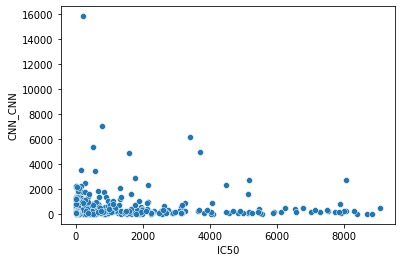

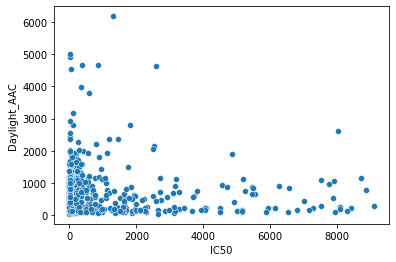

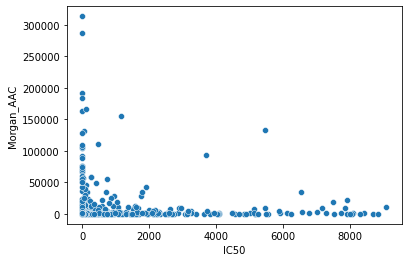

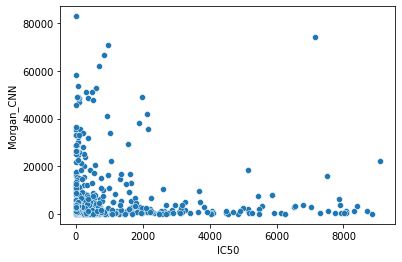

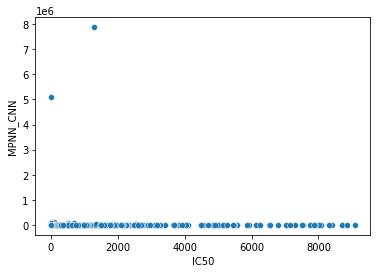

In [11]:
for i in df.columns[4:]:
    
    sns.scatterplot(data = df, x = 'IC50', y =i)
    plt.show()
    plt.close()

log IC50 vs. raw preds

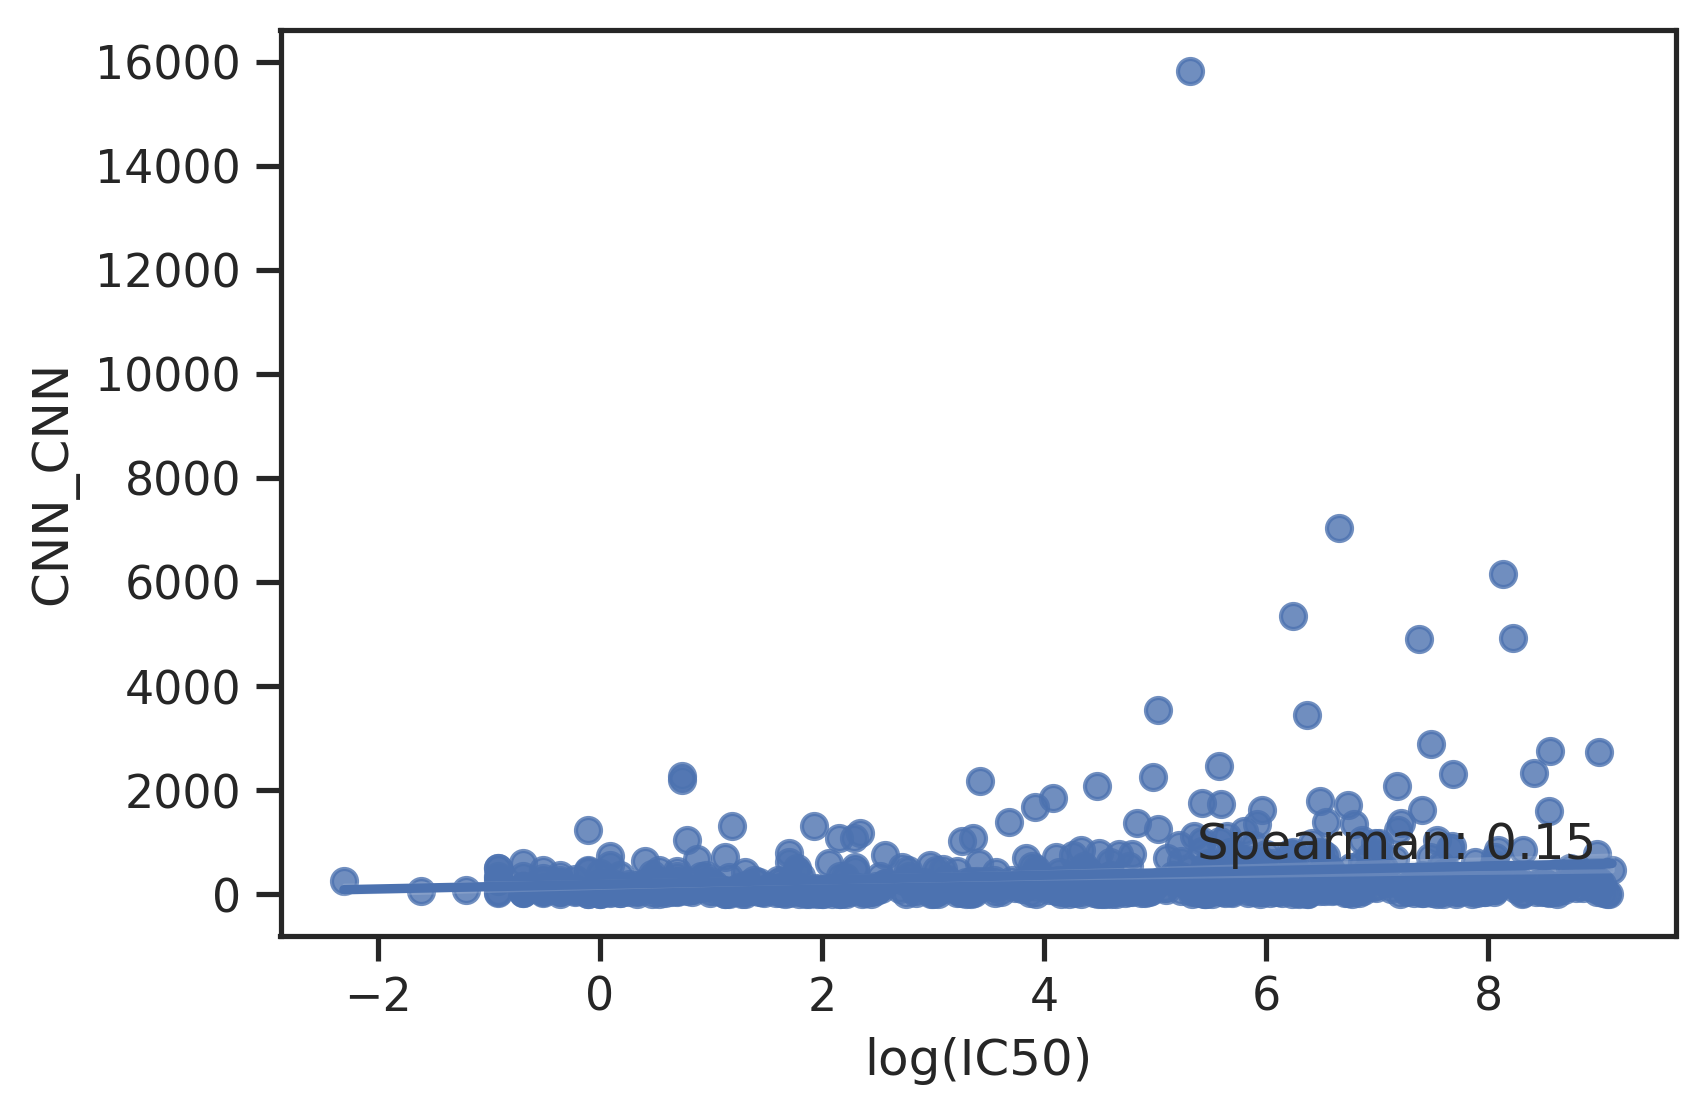

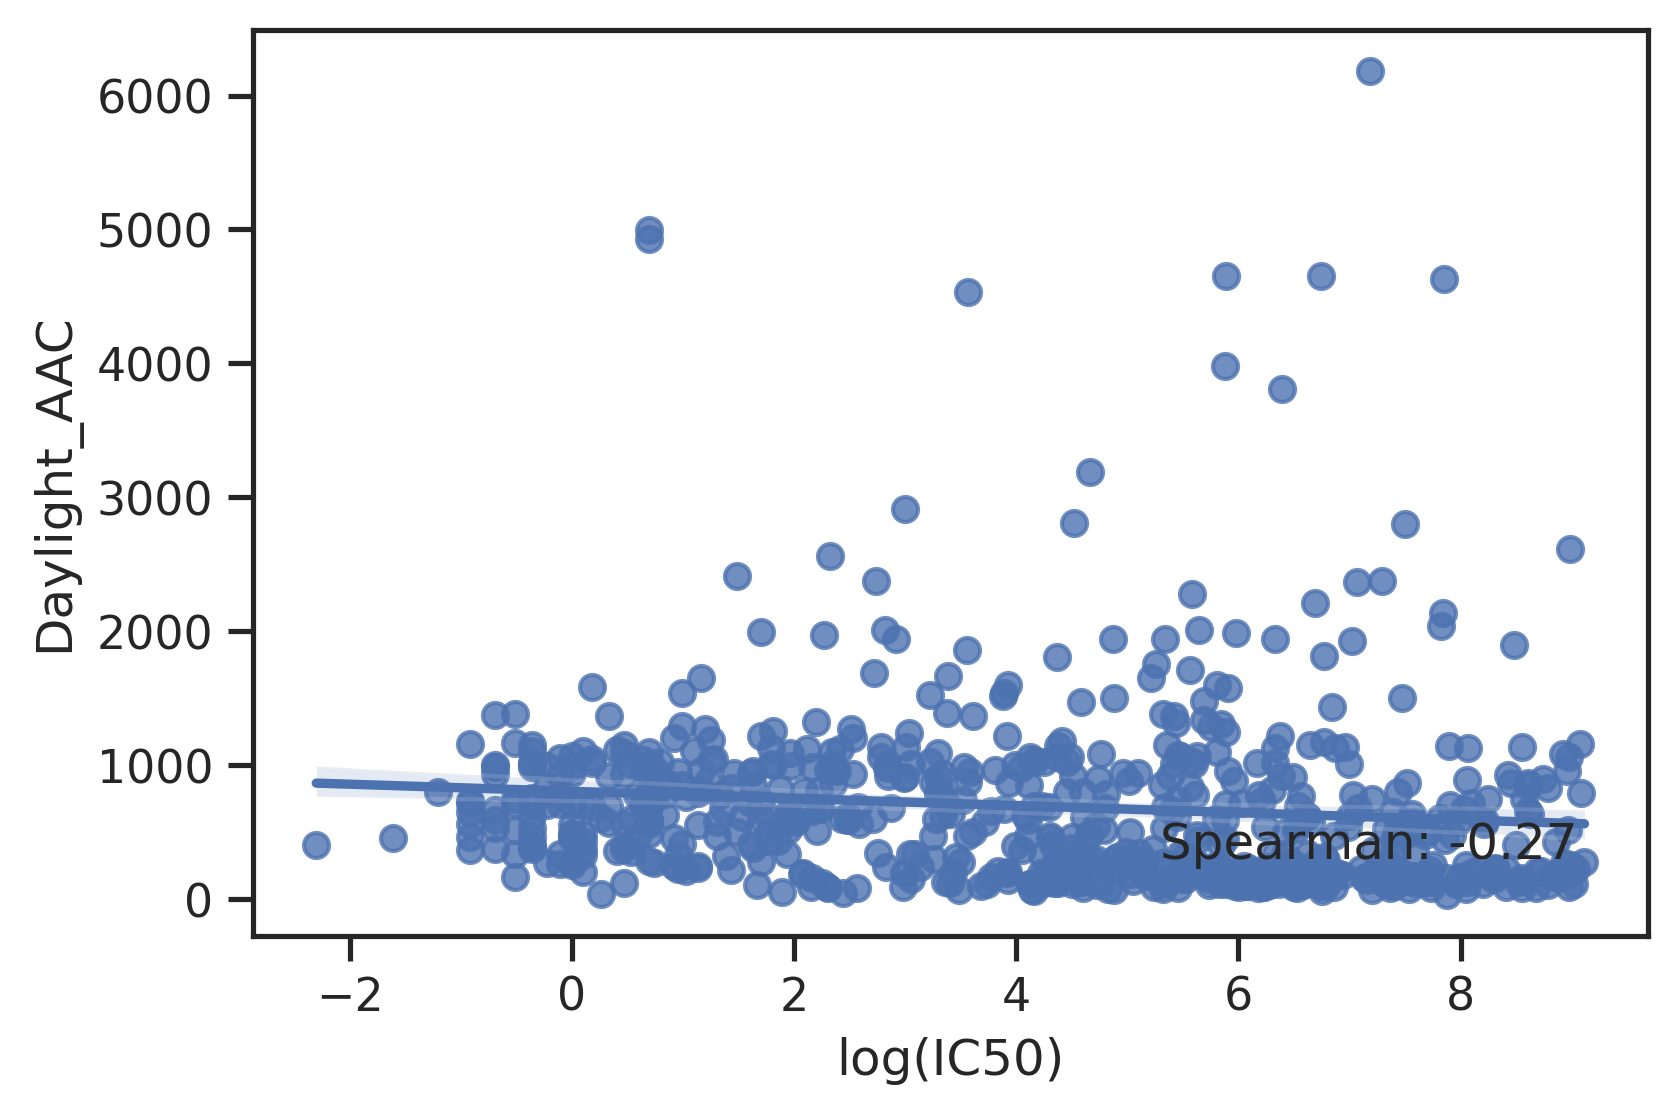

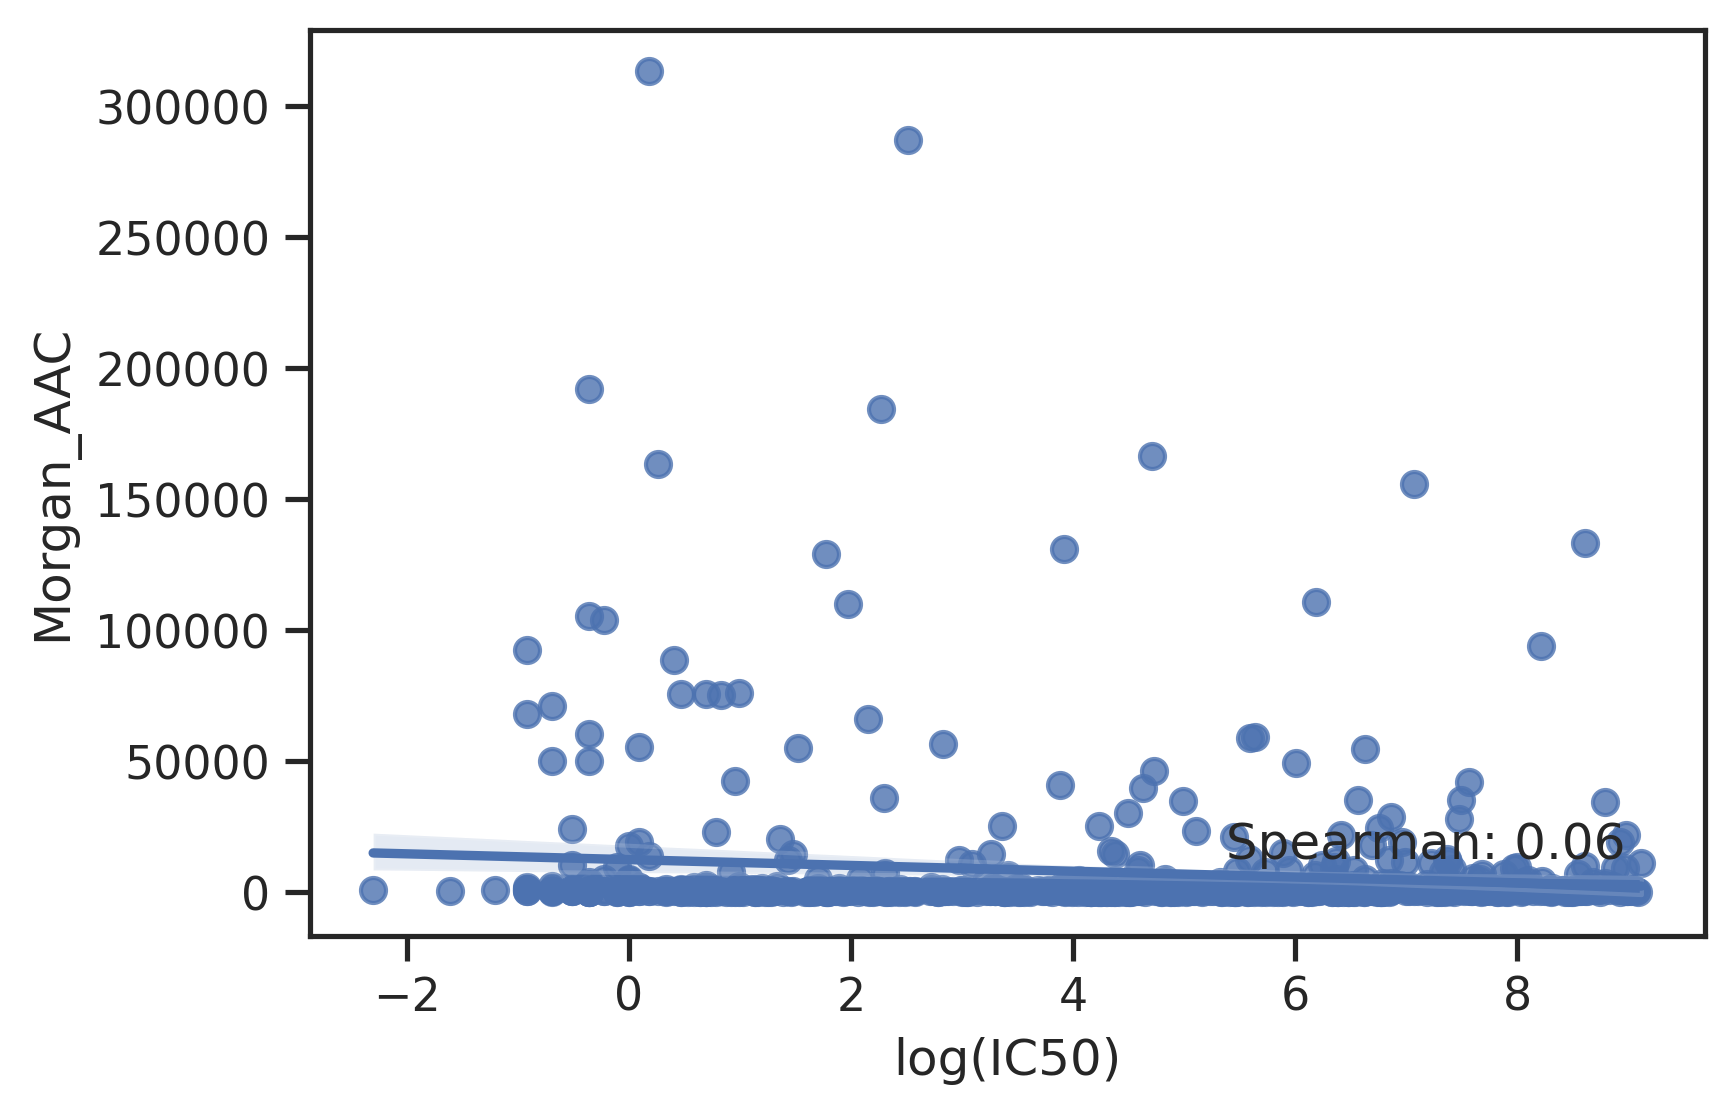

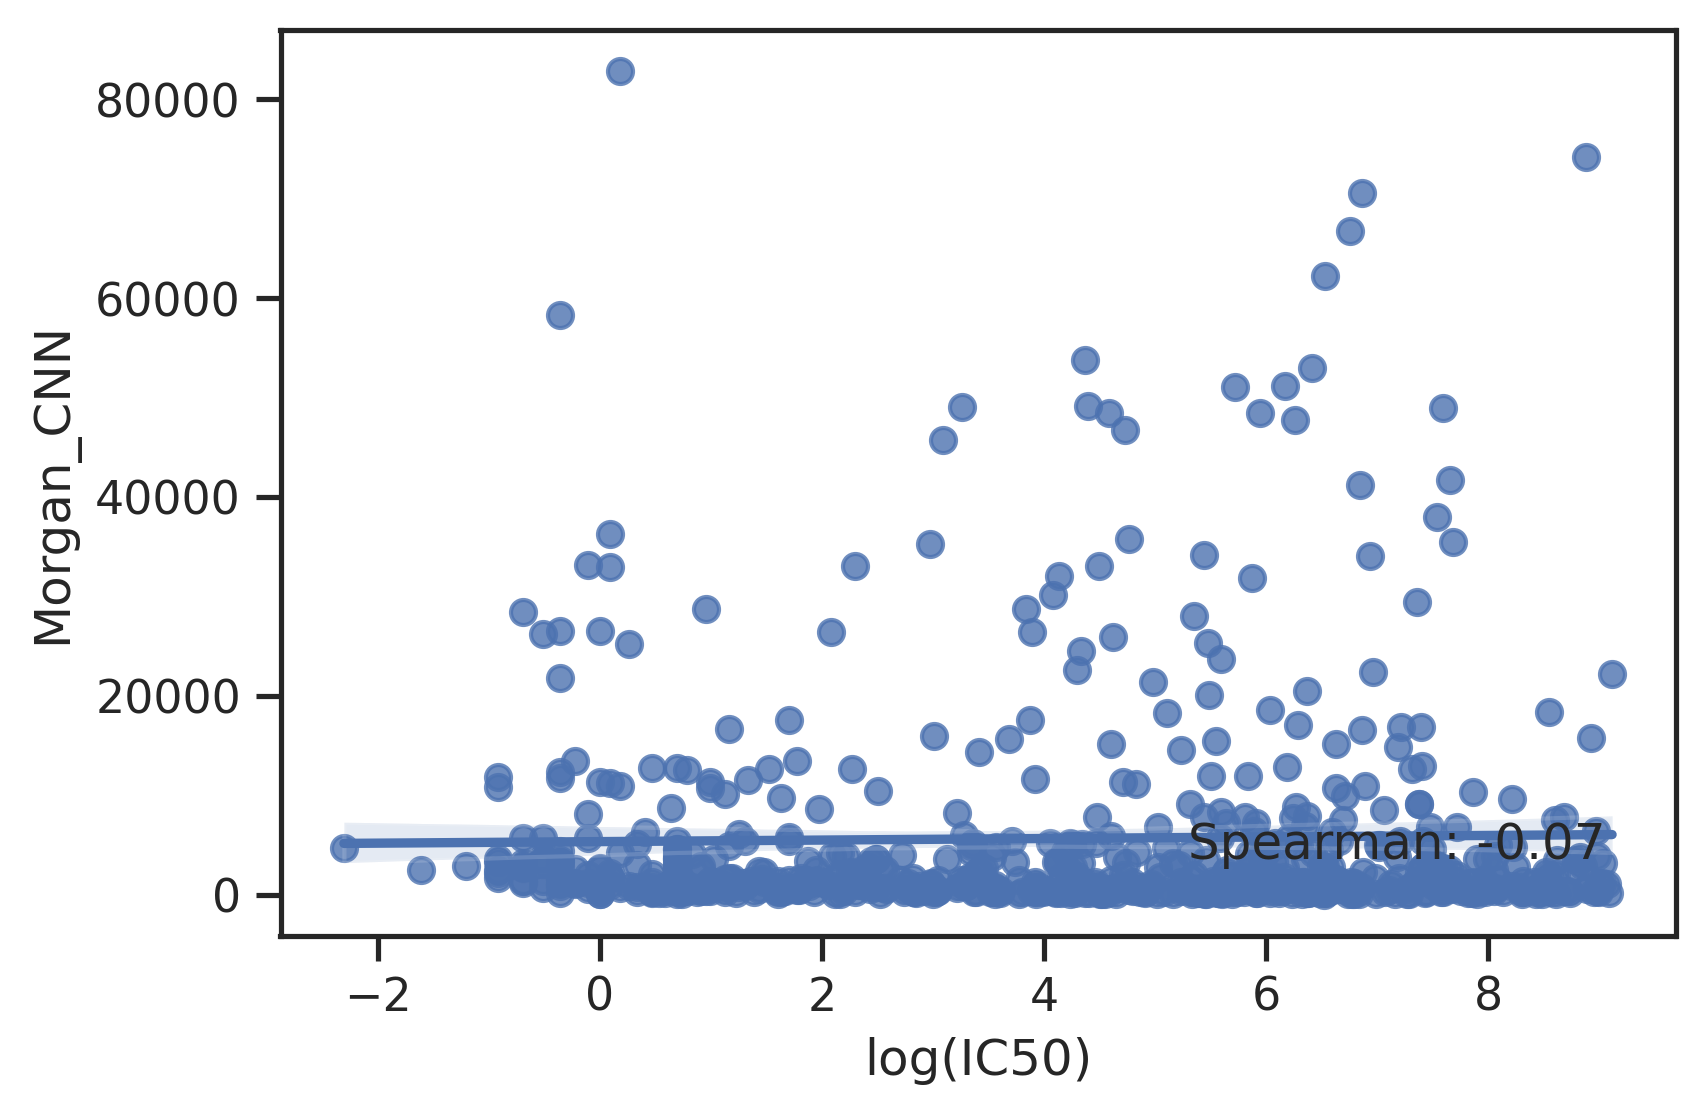

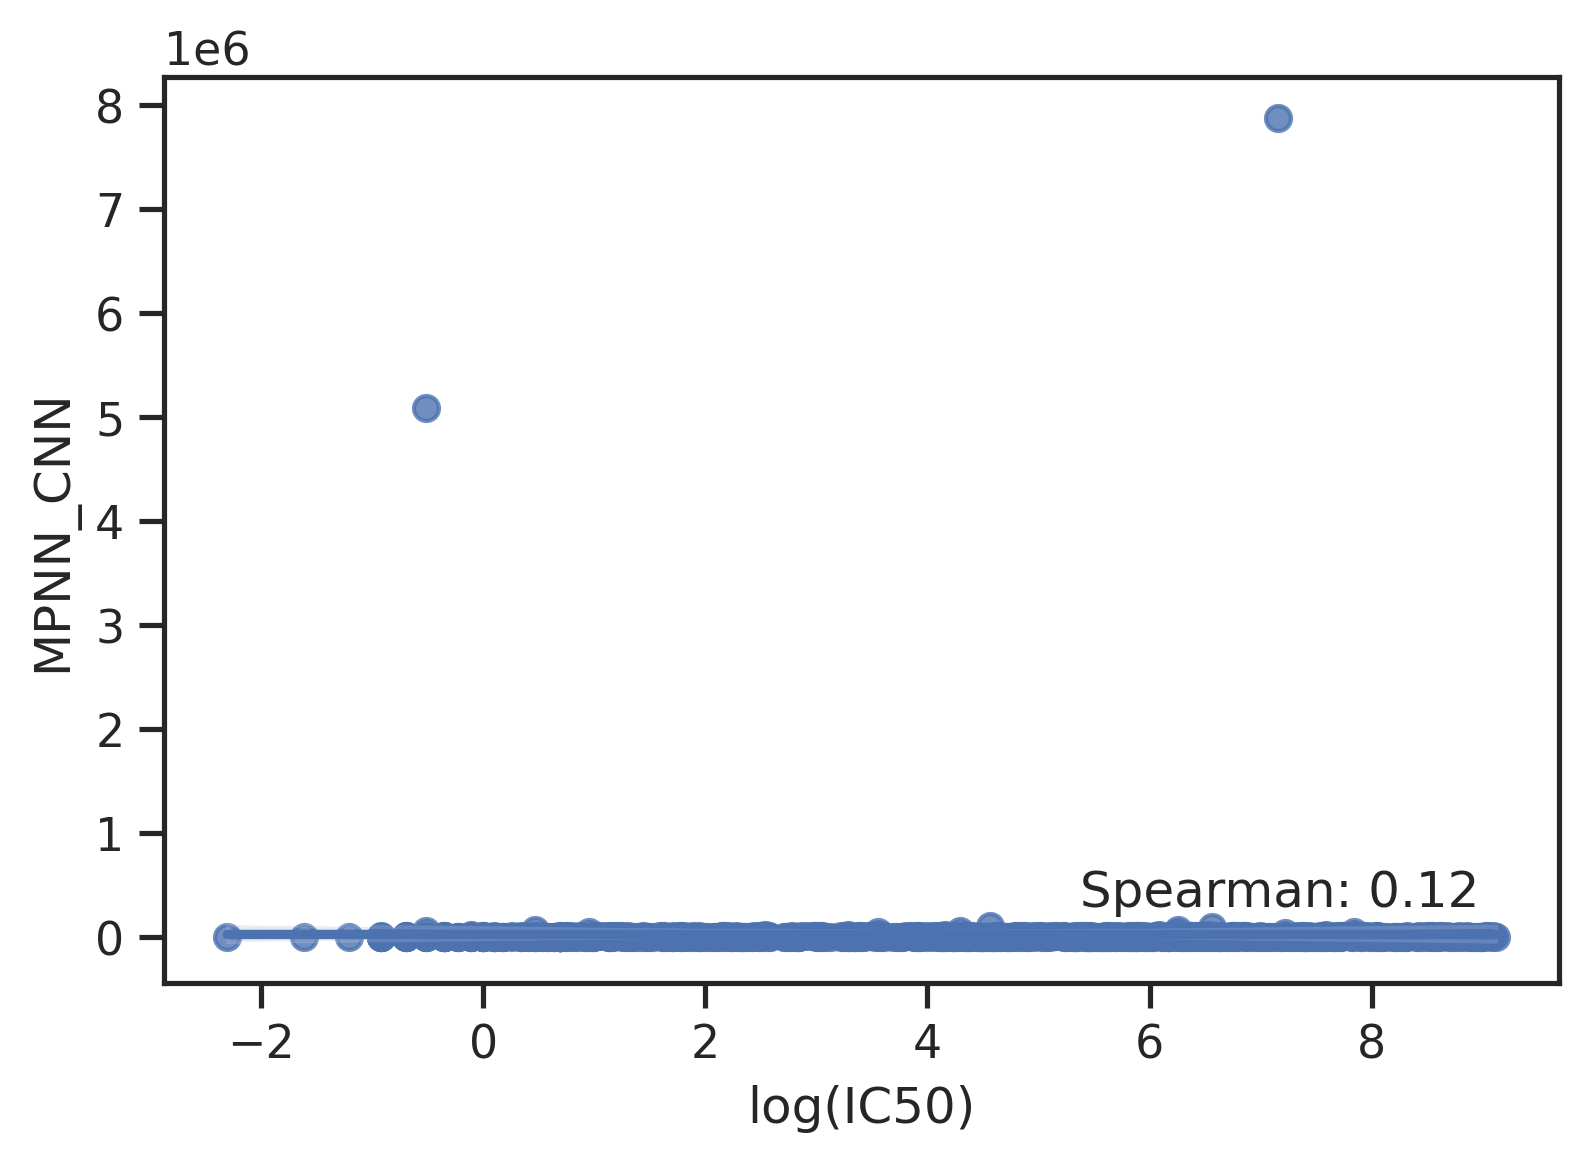

In [22]:
for i in df.columns[4:]:
    
    correlation, pvalue = spearmanr(df.IC50, df[i])
    sns.regplot(data=df,
                x=np.log(df.IC50),
                y=df[i],
               )
    plt.xlabel('log(IC50)')
    plt.text(x=0.8, y=0.1, s=f'Spearman: {correlation:.2f}', transform=plt.gca().transAxes, ha='center', va='center')
    plt.show()
    plt.close()

## Correlations of targets (IC50, erk_IC50, and Kd)

In [86]:
def plot_corr(x,#a column of df
              y,#a column of df
              xlabel=None,# x axis label
              ylabel=None,# y axis label
              order=3, # polynomial level, if straight, order=1 
             ):
    correlation, pvalue = spearmanr(x, y)
    sns.regplot(x=x,
            y=y,
            order=order,
            line_kws={'color': 'gray'}
           )
    
    if xlabel is not None:
        plt.xlabel(xlabel)
        
    if ylabel is not None:
        plt.ylabel(ylabel)

    plt.text(x=0.8, y=0.1, s=f'Spearman: {correlation:.2f}', transform=plt.gca().transAxes, ha='center', va='center');

### IC50 vs. erk_IC50

In [ ]:
erk = df.query('erk_IC50 < 16666')

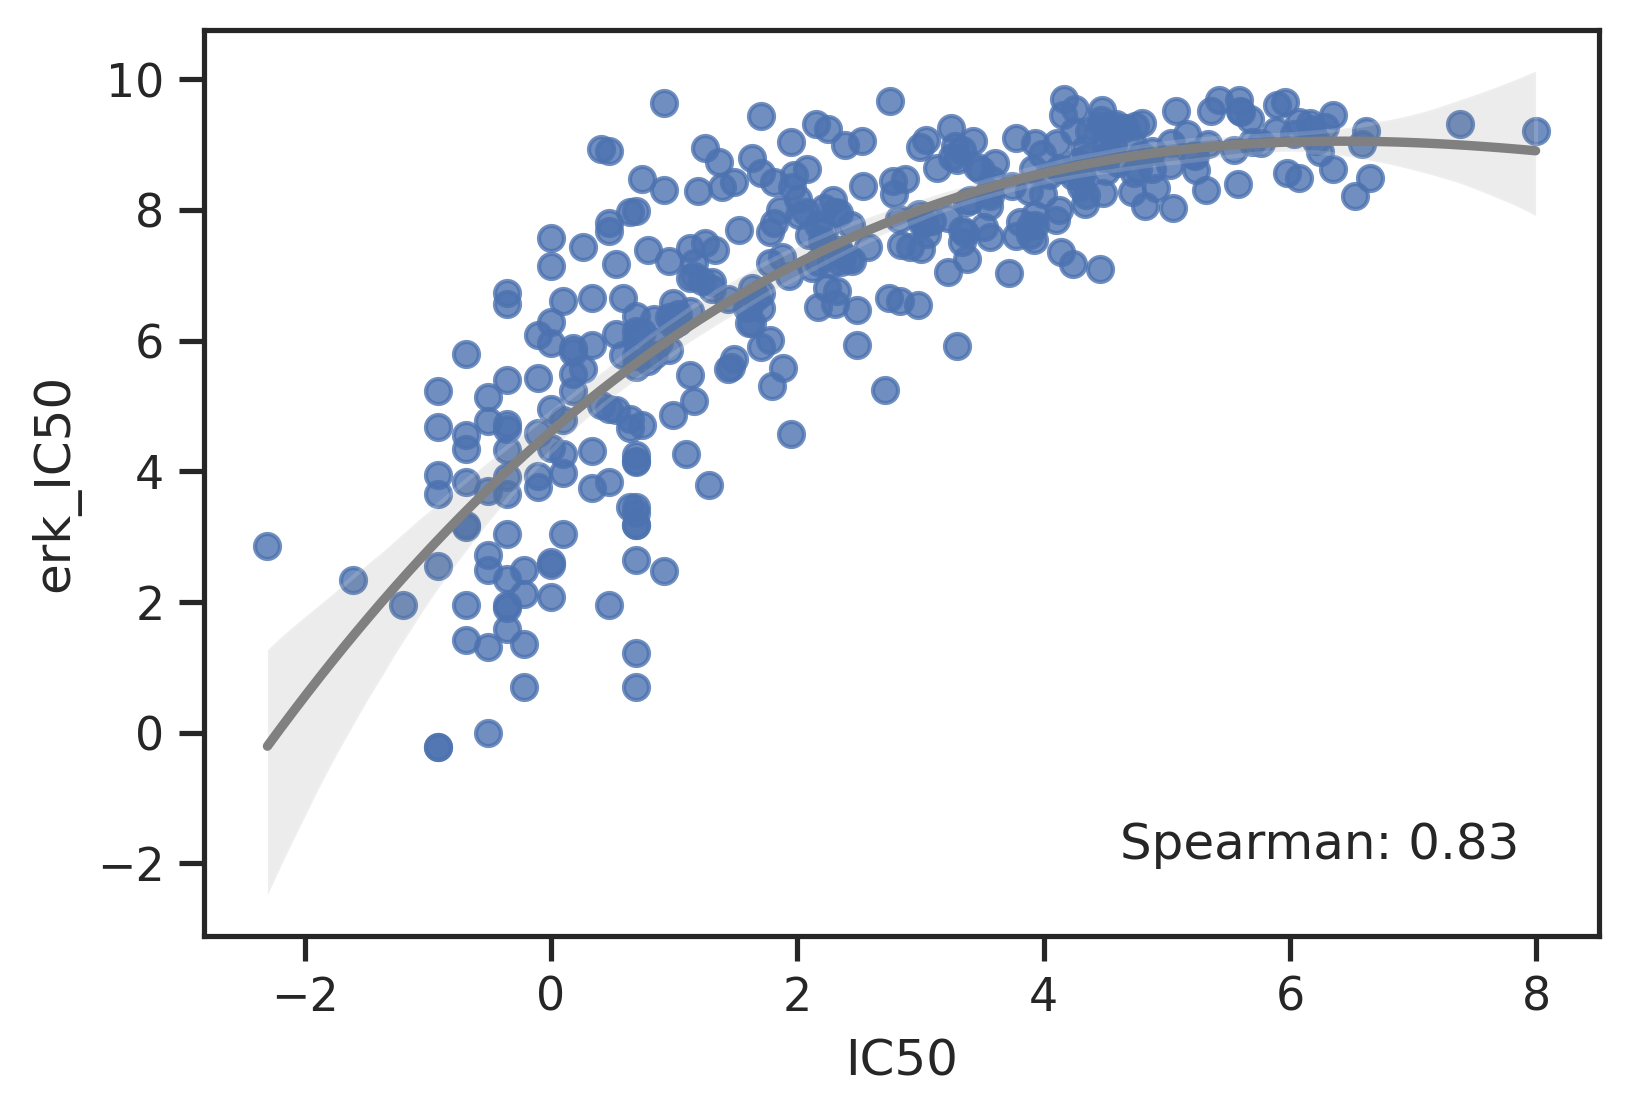

In [40]:
plot_corr(np.log(erk.IC50),np.log(erk.erk_IC50))

### IC50 vs. Kd

In [81]:
kd = df.query('0<Kd<150000')

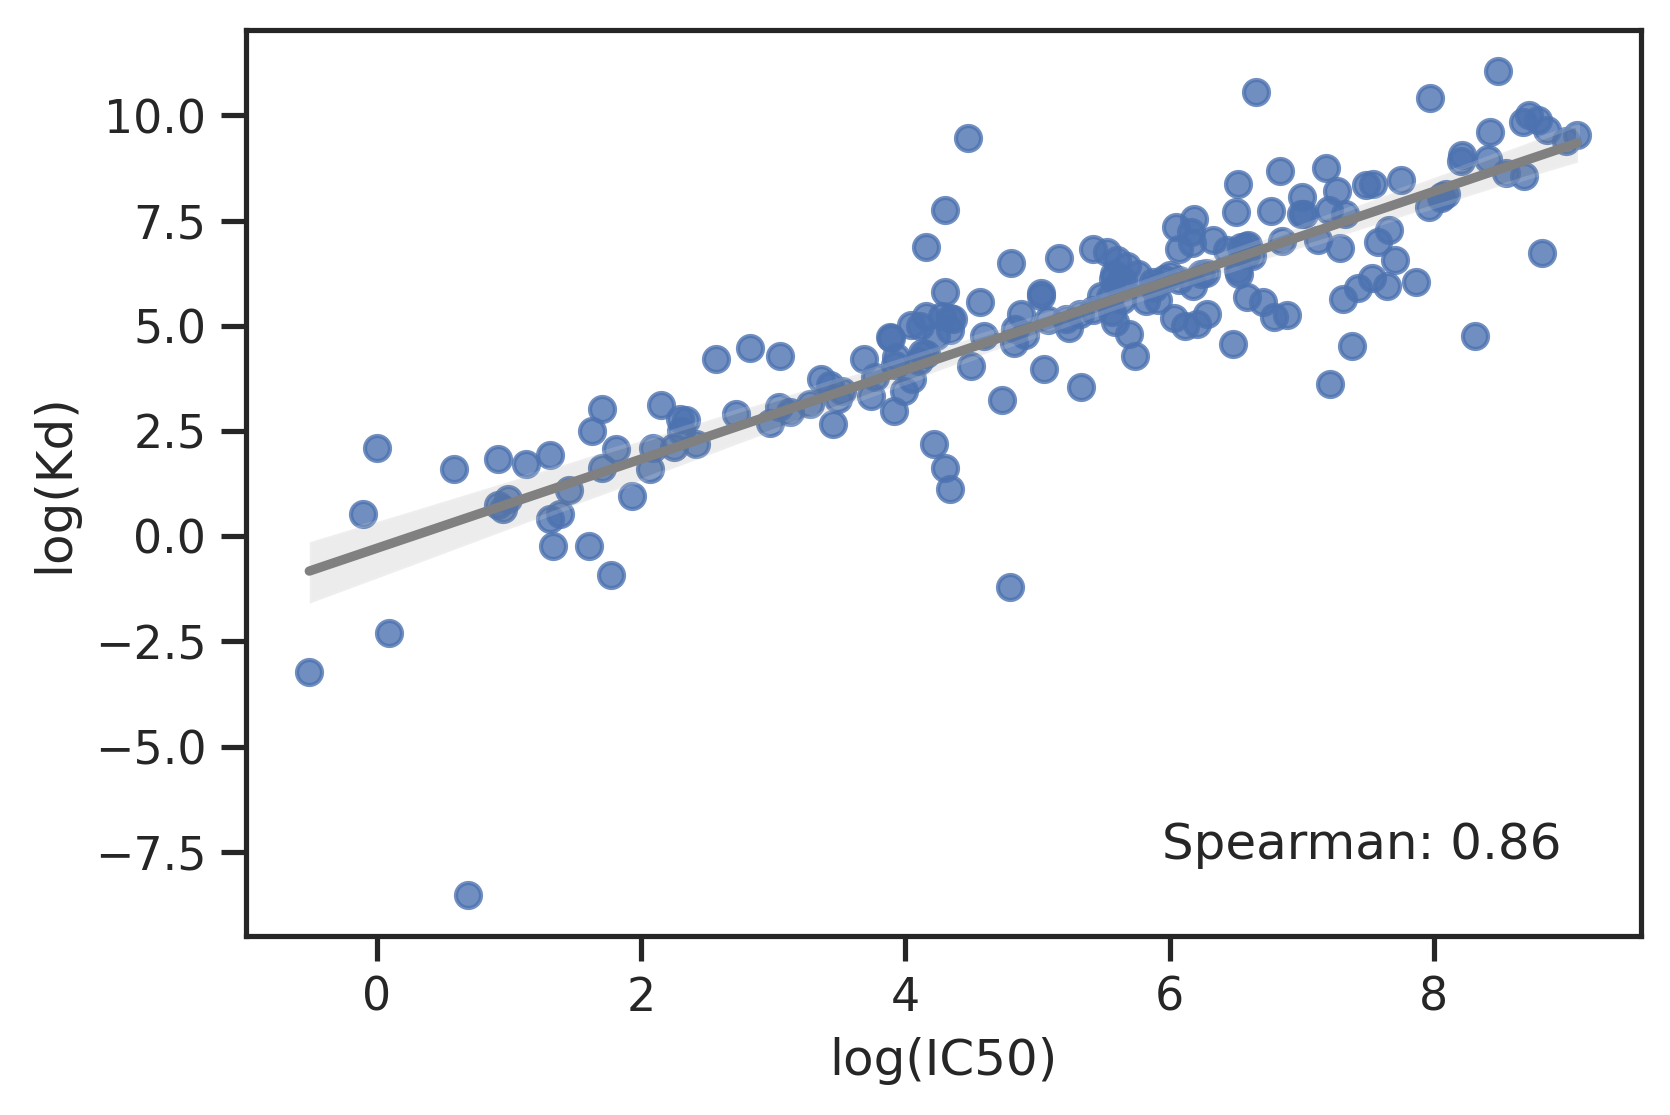

In [85]:
plot_corr(np.log(kd.IC50),np.log(kd.Kd),"log(IC50)","log(Kd)",order=1)

### erk_IC50 vs. Kd

In [110]:
df3 = kd.query('erk_IC50<16666')

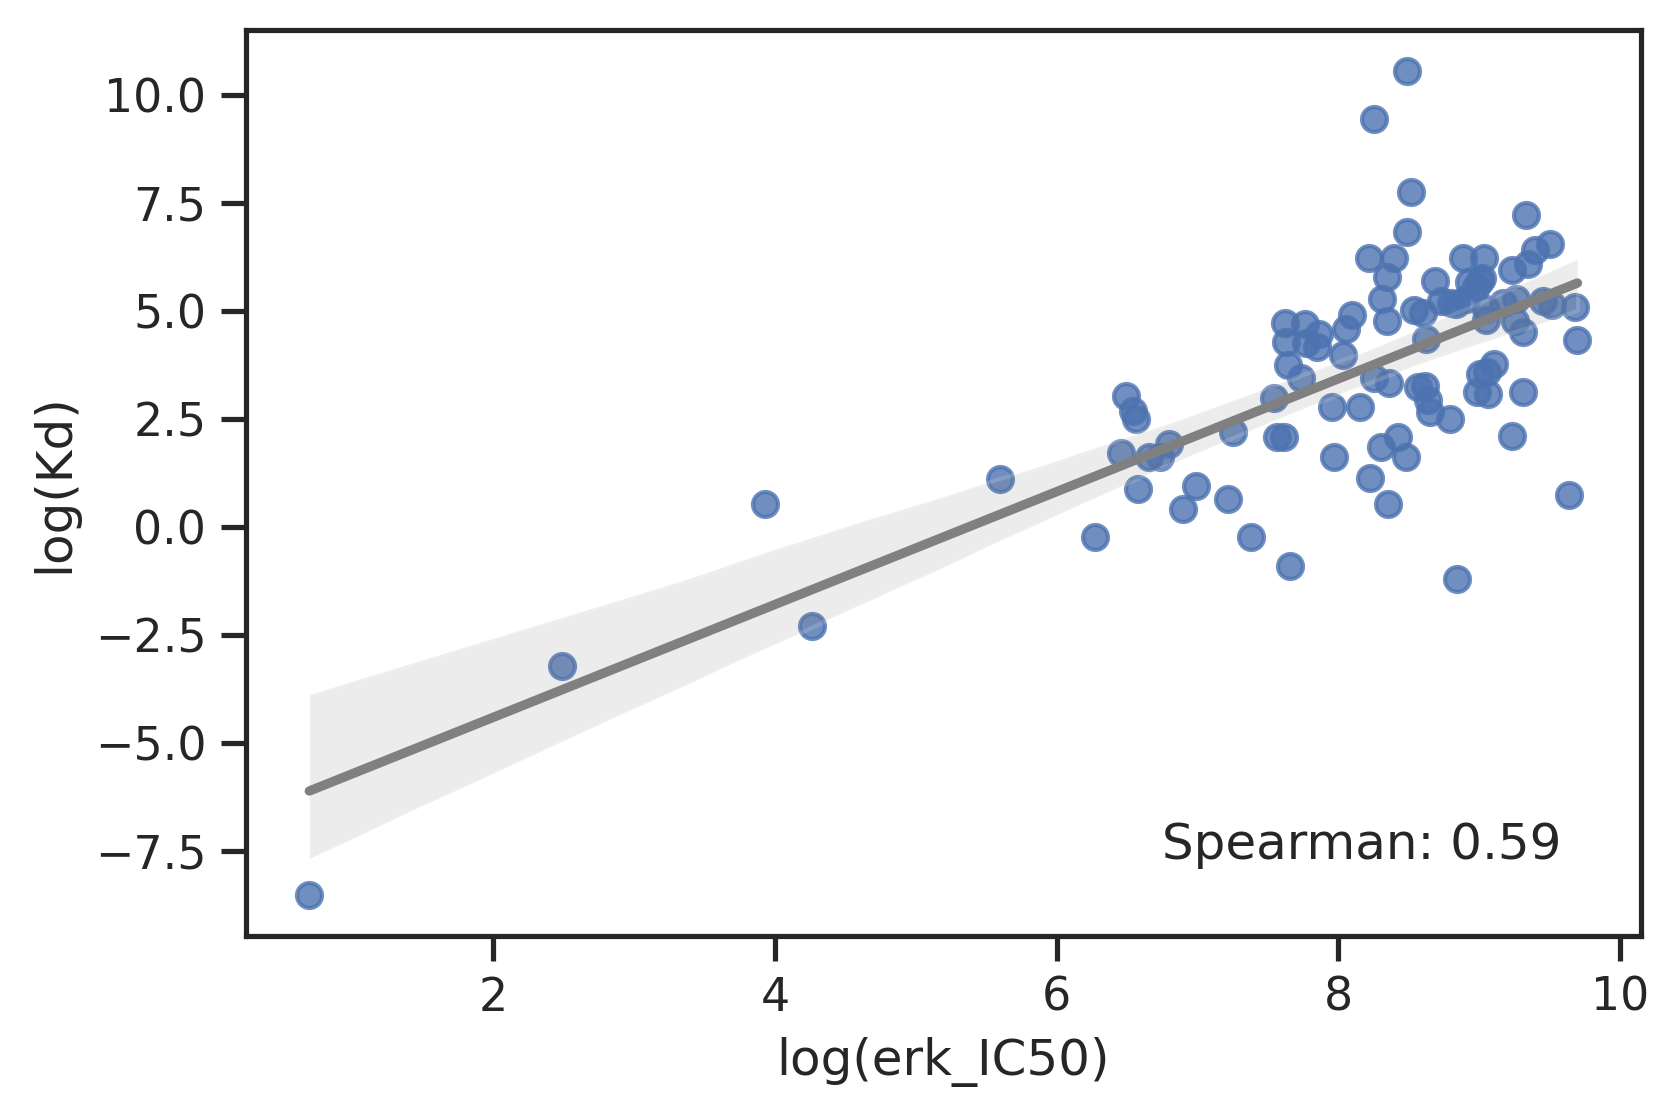

In [111]:
plot_corr(np.log(df3.erk_IC50),np.log(df3.Kd),"log(erk_IC50)","log(Kd)",order=1)

<AxesSubplot:>

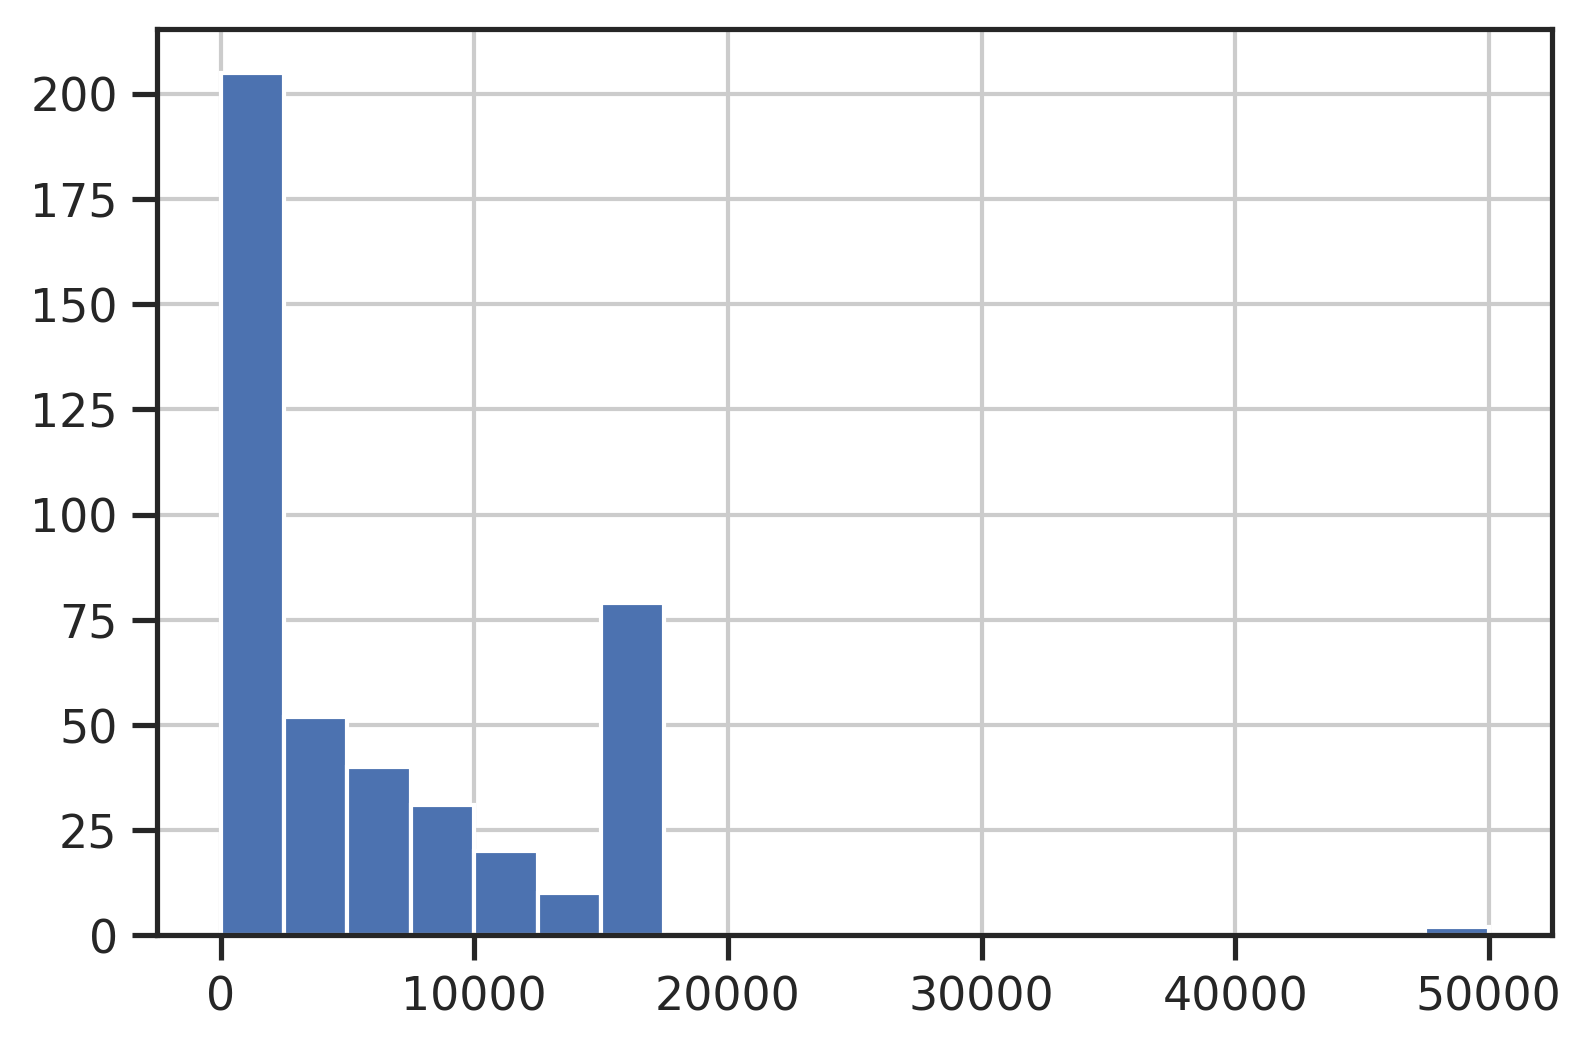

In [103]:
df.erk_IC50.hist(bins=20)

In [106]:
df.Kd.value_counts()

1000000.0    6
1.7          2
9.0          2
5.0          2
500000.0     2
            ..
896.6        1
1089.4       1
11958.2      1
259.1        1
73.0         1
Name: Kd, Length: 228, dtype: int64